<a href="https://colab.research.google.com/github/Simu-Sultana/Time-Series-Analysis/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/FremontBridge.csv", index_col = 'Date', parse_dates =True)
data.head()

<ipython-input-9-7c52084cf8ca>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("/content/drive/MyDrive/Dataset/FremontBridge.csv", index_col = 'Date', parse_dates =True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [11]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


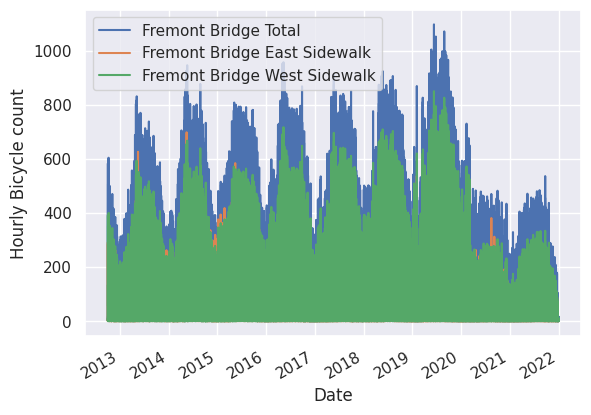

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

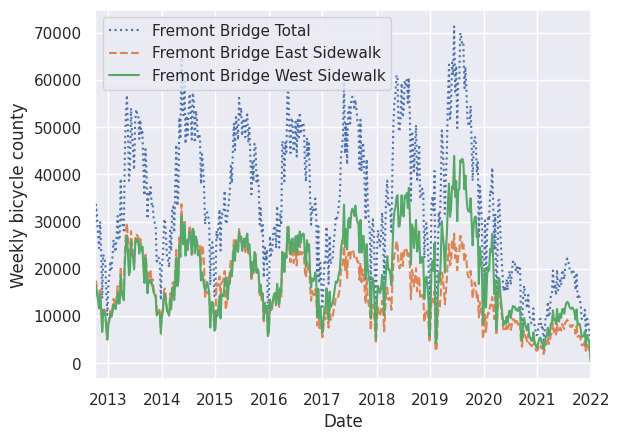

In [13]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle county')
plt.show()

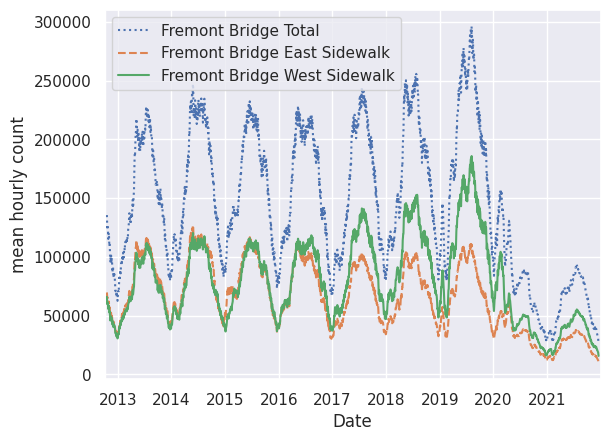

In [14]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style=[':', '--', '-'])
plt.ylabel("mean hourly count")
plt.show()

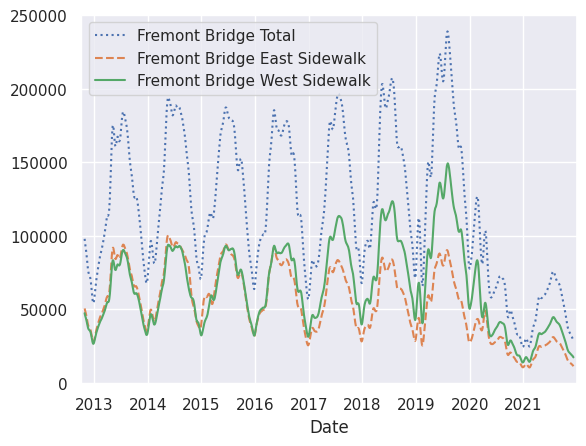

In [17]:
daily.rolling(50, center= True, win_type='gaussian').sum(std=10).plot(style=[':','--','-'])
plt.show()

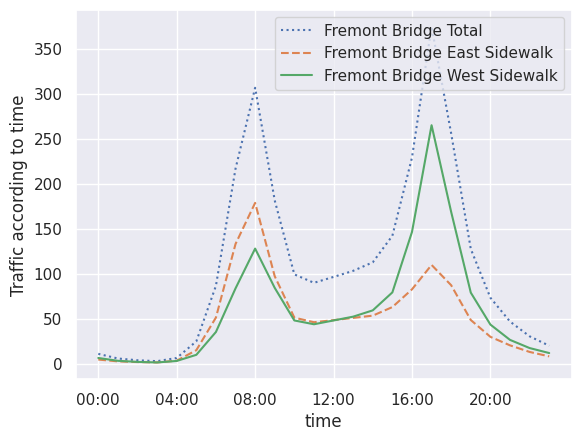

In [18]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60* np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()